Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.
- Works best when data is 'tidy'

Cons?

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

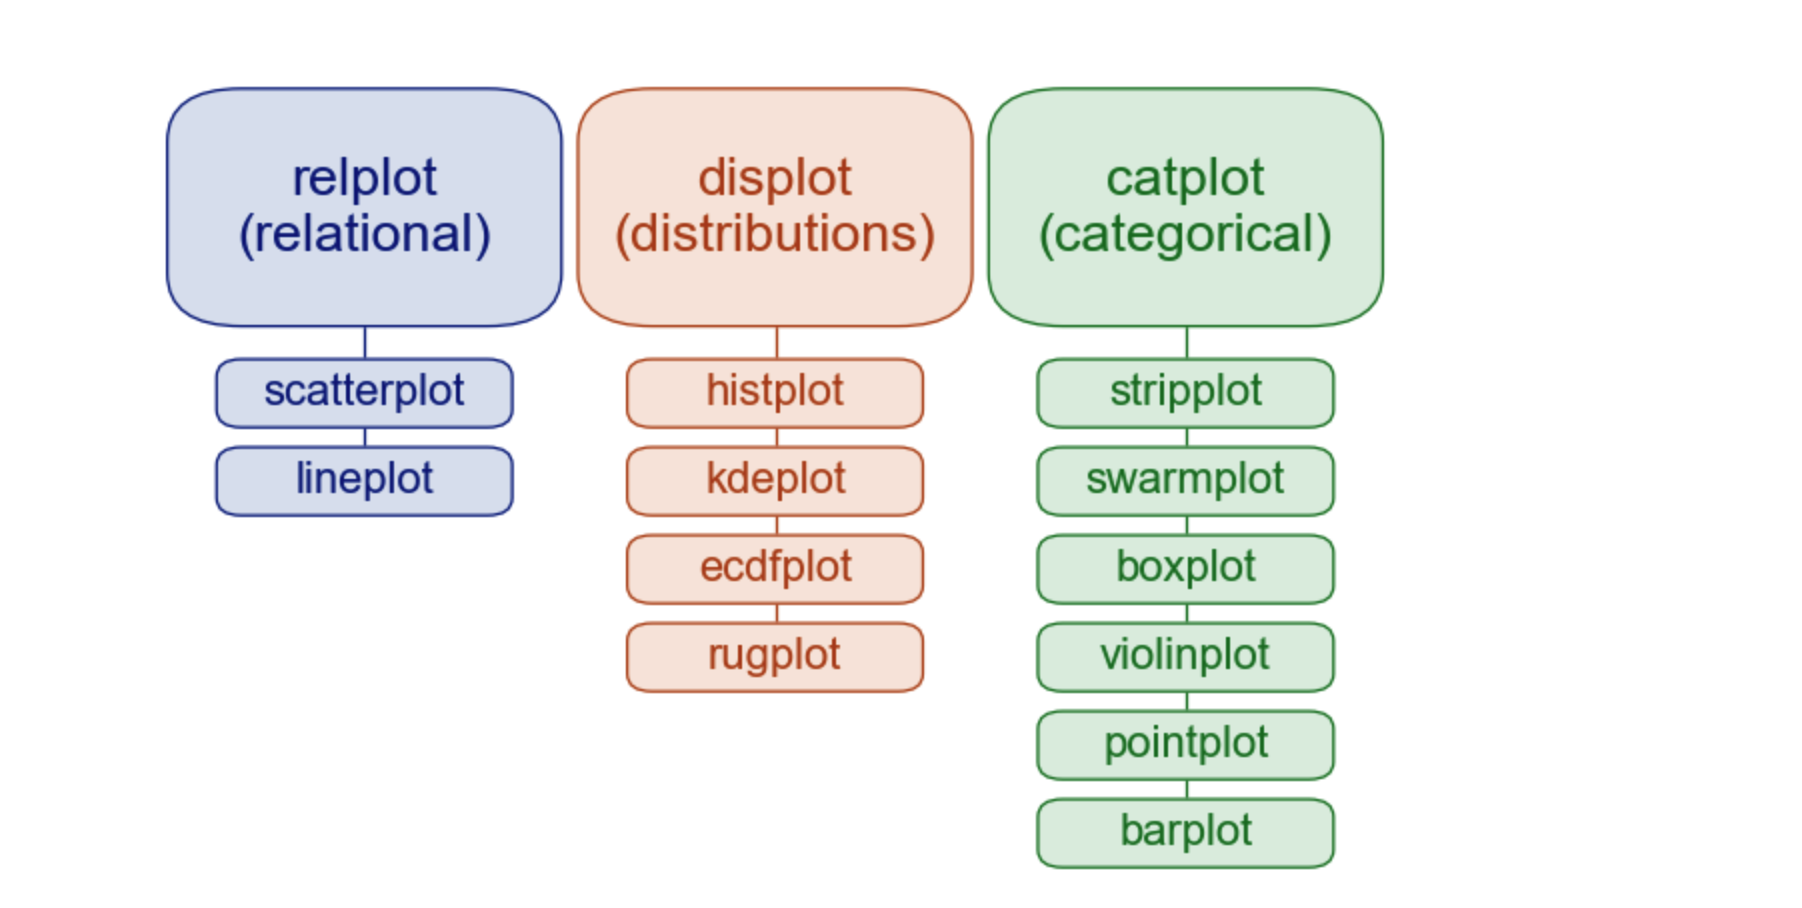

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [2]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')

In [4]:
# Option 2: Load using pydataset
tips = data('tips')

In [5]:
data('tips', show_doc = True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [6]:
# check the head
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# check for nulls and datatypes
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

In [8]:
# scatterplot in matplotlib



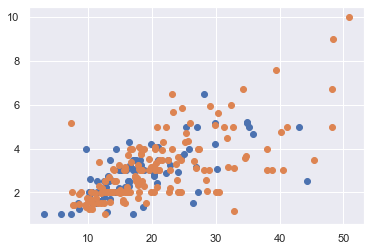

In [42]:
#matplotlib superimpose female and male tips

plt.scatter(tips[tips.sex == 'Female'].total_bill, tips[tips.sex == 'Female'].tip)
plt.scatter(tips[tips.sex == 'Male'].total_bill, tips[tips.sex == 'Male'].tip)

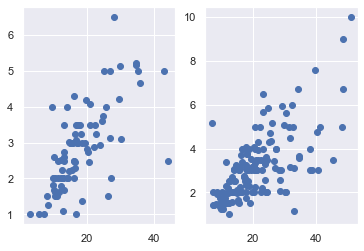

In [43]:
plt.subplot(121)
plt.scatter(tips[tips.sex == 'Female'].total_bill, tips[tips.sex == 'Female'].tip)
plt.subplot(122)
plt.scatter(tips[tips.sex == 'Male'].total_bill, tips[tips.sex == 'Male'].tip)

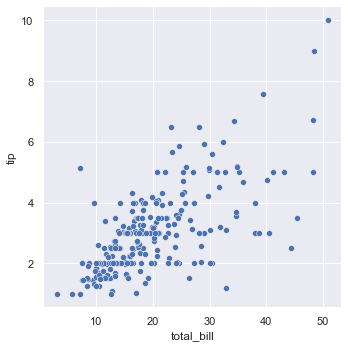

In [39]:
# Explore relationship between total_bill and tip using relplot

sns.relplot(data = tips, x = 'total_bill', y = 'tip')

In [10]:
# Update defaults (rc params in matplotlib)

sns.set_theme()  # https://seaborn.pydata.org/generated/seaborn.set_theme.html

In [11]:
# same plot above, but with different sns defaults ()



### hue, size and style arguments

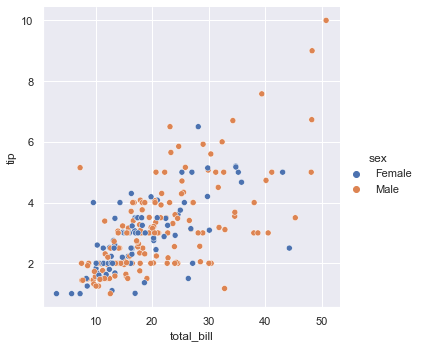

In [45]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)

sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex')

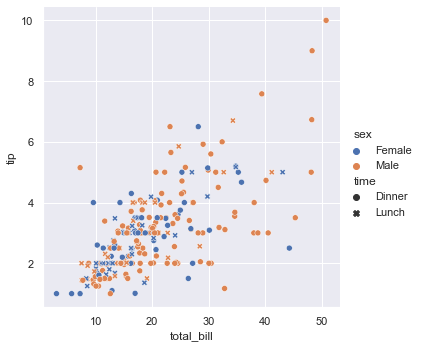

In [47]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', style = 'time')

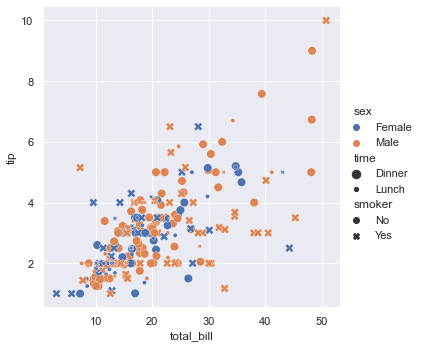

In [48]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', style = 'smoker', size = 'time')

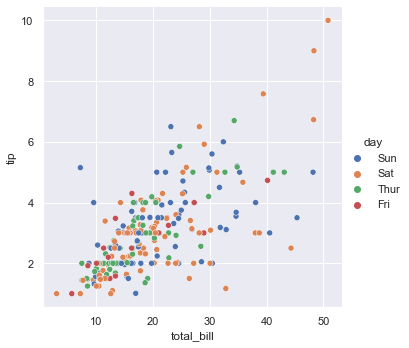

In [46]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'day')

## Relplot with 'kind' argument

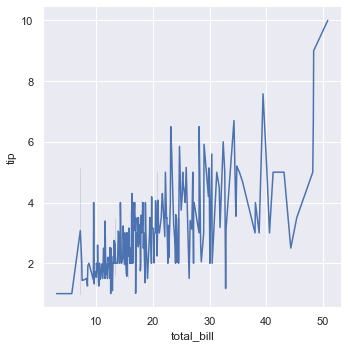

In [49]:
# lineplot for total bill vs tips - may not be appropriate in this case. Note use of 'kind' argument


sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind = 'line')

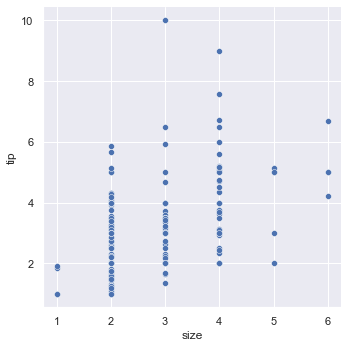

In [50]:
# lineplot for discrete values. The lineplot will use mean value at each size to draw a line 
# shaded region is 95% CI. Can be turned off with 'ci = None'

sns.relplot(data = tips, x = 'size', y = 'tip')

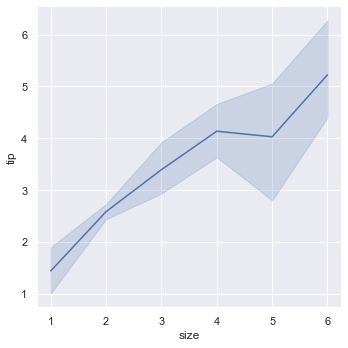

In [51]:
# shaded region is 95% CI. Can be turned off with 'ci = None'
sns.relplot(data = tips, x = 'size', y = 'tip', kind = 'line') 

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

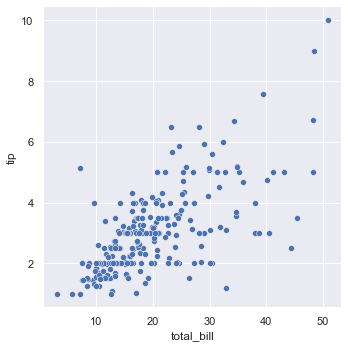

In [52]:
#  FacetGrid with 'col'

sns.relplot(data = tips, x = 'total_bill', y = 'tip')

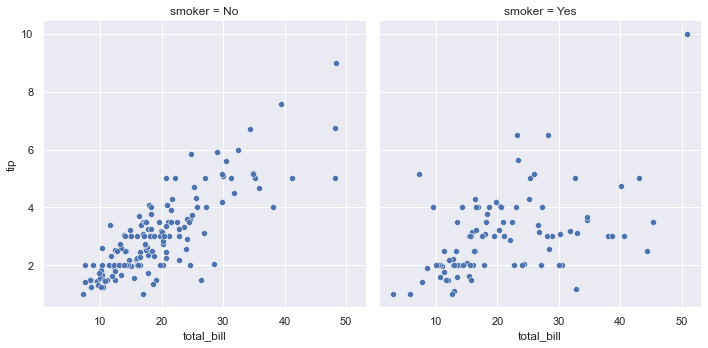

In [53]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'smoker')

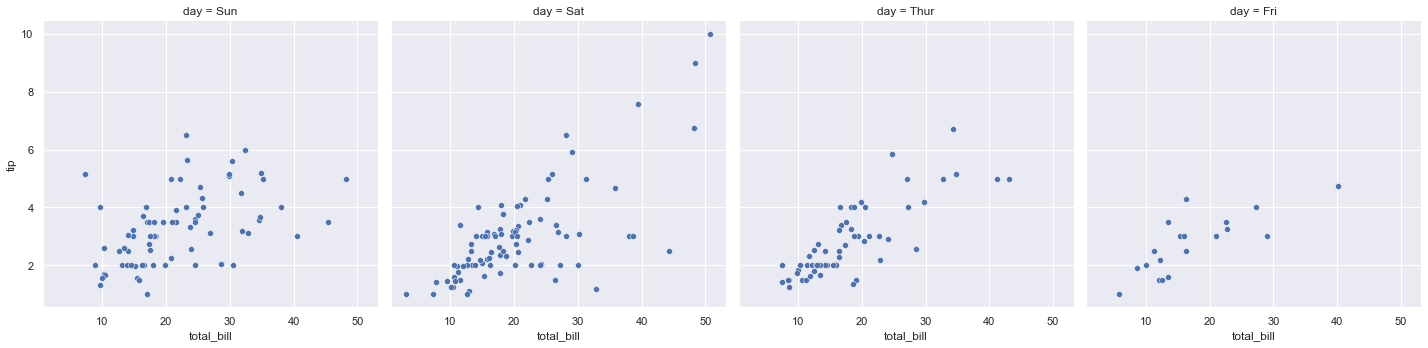

In [54]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'day')

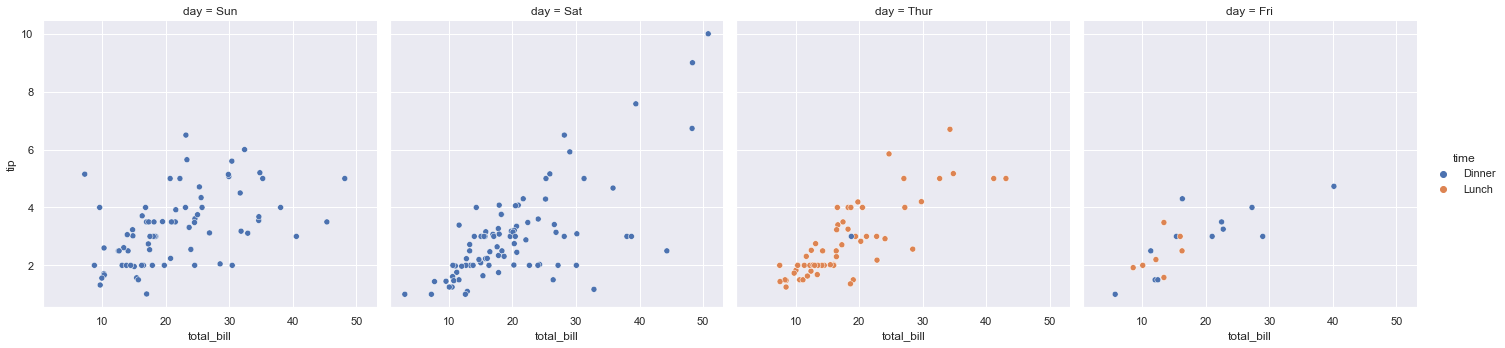

In [57]:
sns.relplot(data = tips, 
            x = 'total_bill', 
            y = 'tip', 
            col = 'day', 
            hue = 'time')

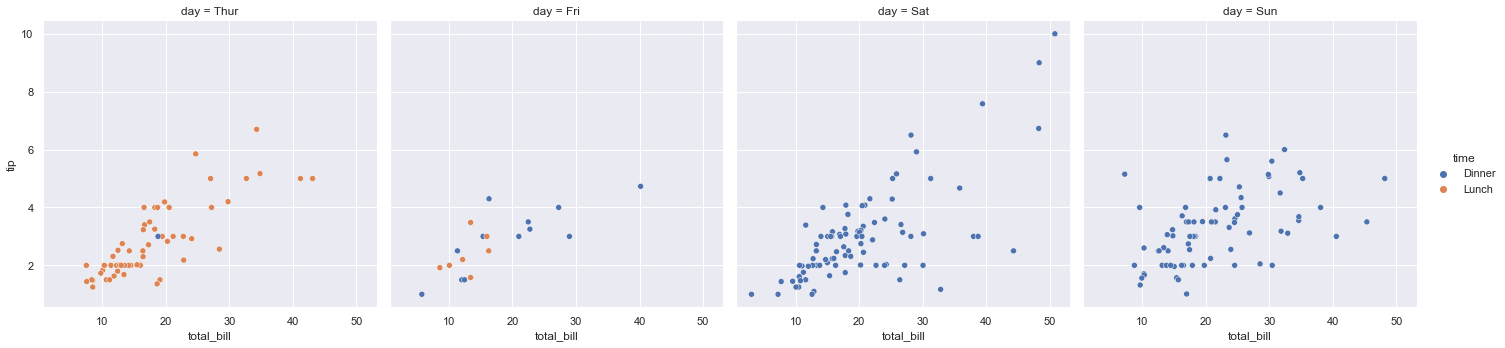

In [58]:
sns.relplot(data = tips, 
            x = 'total_bill', 
            y = 'tip', 
            col = 'day', 
            hue = 'time',
           col_order = ['Thur', 'Fri', 'Sat', 'Sun'])AC

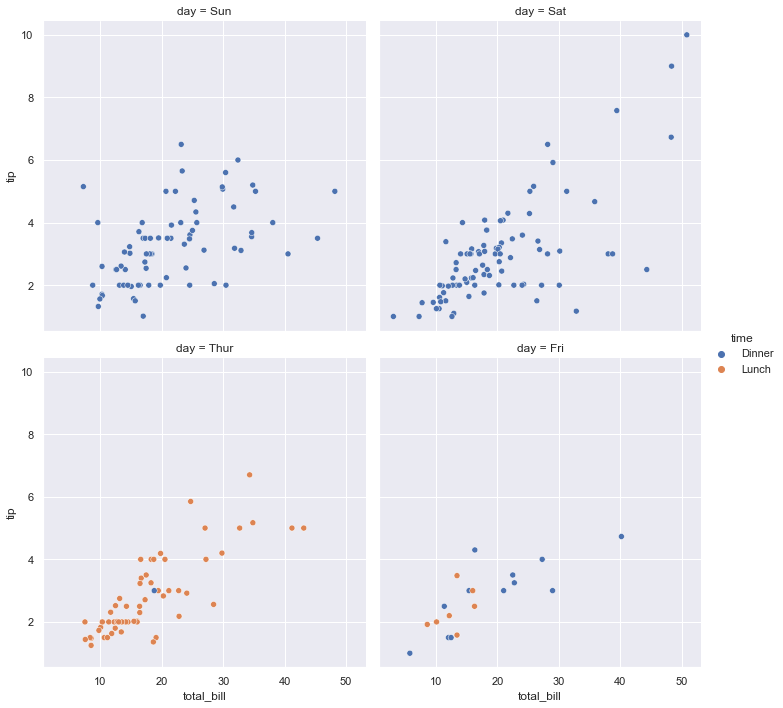

In [60]:
sns.relplot(data = tips, 
            x = 'total_bill', 
            y = 'tip', 
            col = 'day', 
            hue = 'time',
           col_wrap = 2)   #col_wrap wraps the columns by number

#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


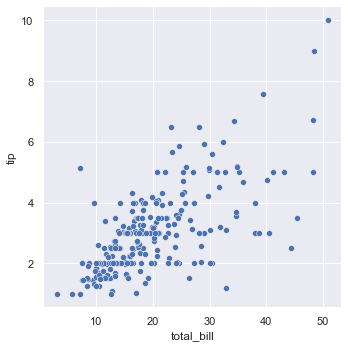

In [61]:
# Facetgrid with lineplot

sns.relplot(data = tips, x = 'total_bill', y = 'tip')

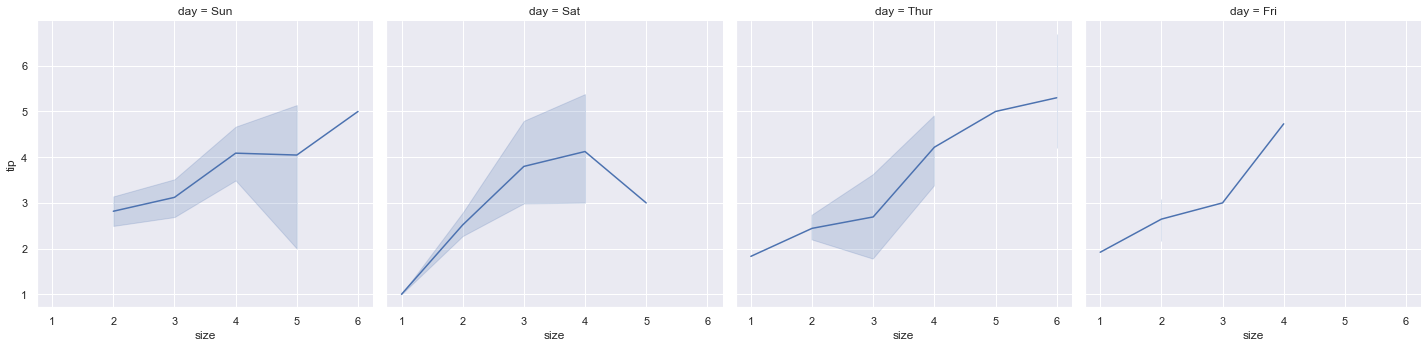

In [66]:
sns.relplot(data = tips, x = 'size', y = 'tip', kind = 'line', col = 'day')

#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


#### Using Scatterplot or lineplots instead of relplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

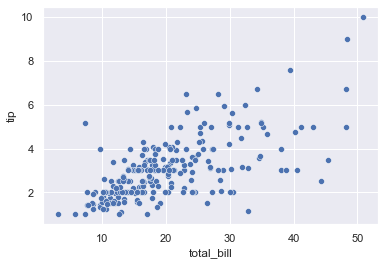

In [65]:
# scatterplot - returns an axes level object
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')

## Distributions: displot

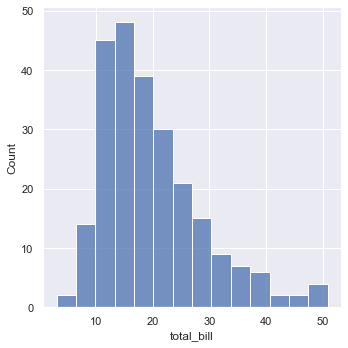

In [67]:
# displot for total_bill (hist, kde, rug)

sns.displot(data = tips, x = 'total_bill')

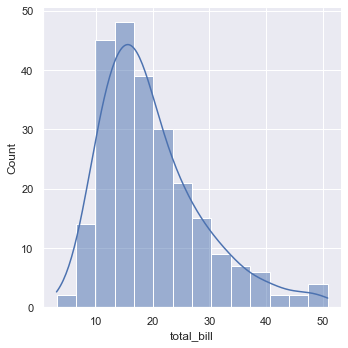

In [68]:
#kde is useful...
sns.displot(data = tips, x = 'total_bill', kde = True)

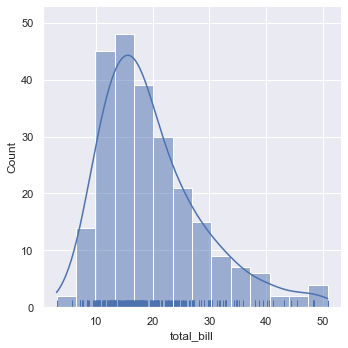

In [69]:
#rug plot helpful to tell you some data is there even that might not be otherwise visable bc scale is so high
sns.displot(data = tips, x = 'total_bill', kde = True, rug = True)

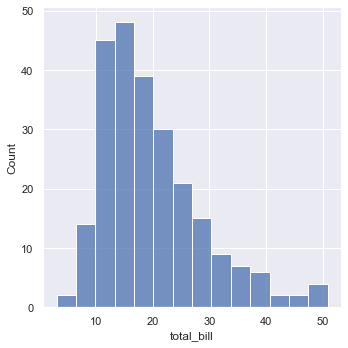

In [70]:
# histogram with hue and stacking and palette


sns.displot(data = tips, x = 'total_bill')

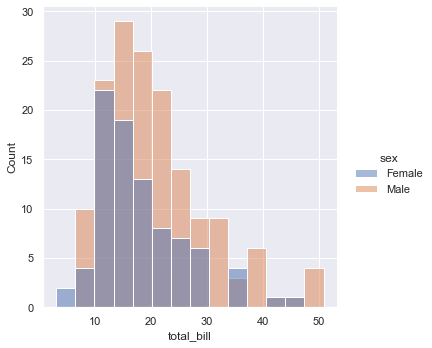

In [71]:
sns.displot(data = tips, 
            x = 'total_bill', 
            hue = 'sex')

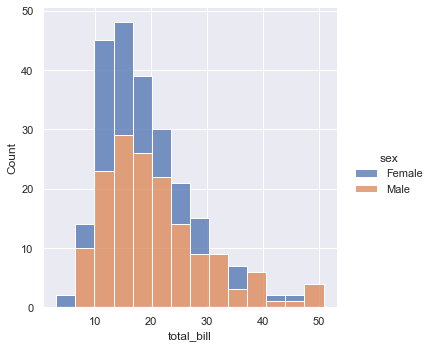

In [72]:
sns.displot(data = tips, 
            x = 'total_bill', 
            hue = 'sex',
           multiple = 'stack')

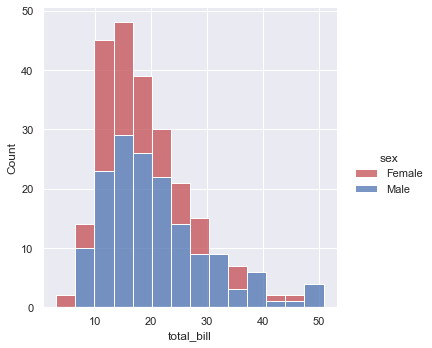

In [73]:
sns.displot(data = tips, 
            x = 'total_bill', 
            hue = 'sex',
           multiple = 'stack',
           palette = ['r', 'b'])

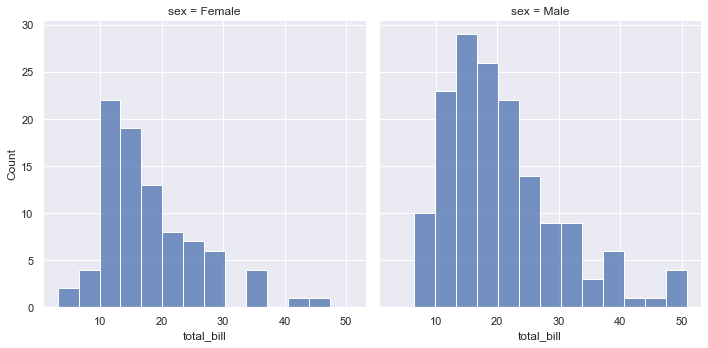

In [74]:
# use 'col' argument with 'sex' to create 'small multiples'

sns.displot(data = tips, 
            x = 'total_bill', 
            col = 'sex')

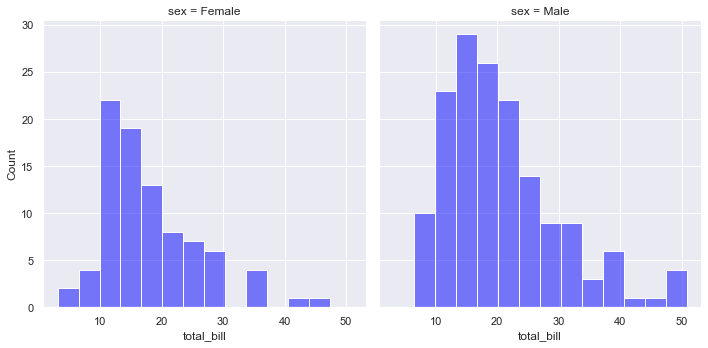

In [76]:
sns.displot(data = tips, 
            x = 'total_bill', 
            col = 'sex',
            color = 'blue',
            alpha = 0.5) #alpha controls transparency 

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

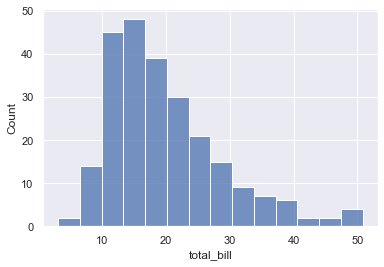

In [78]:
#histplot will return an axes level object

sns.histplot(data = tips, x = 'total_bill')

<AxesSubplot:xlabel='Count', ylabel='total_bill'>

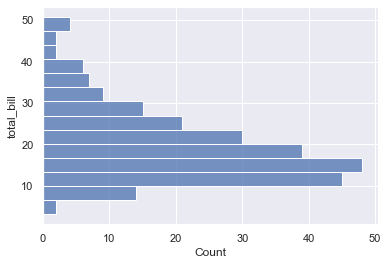

In [79]:
#histplot will return an axes level object

sns.histplot(data = tips, y = 'total_bill')

### Categorial Plots

#### Catplots

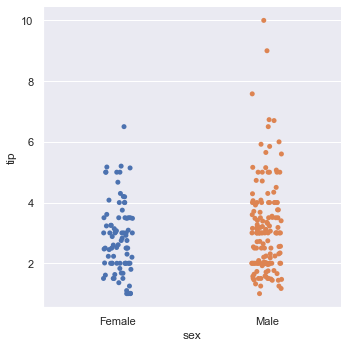

In [80]:
# we can make boxplot with kind = 'box' argument. Returns a figure level object

sns.catplot(data = tips, x= 'sex', y = 'tip') #default behavior w/ x and y

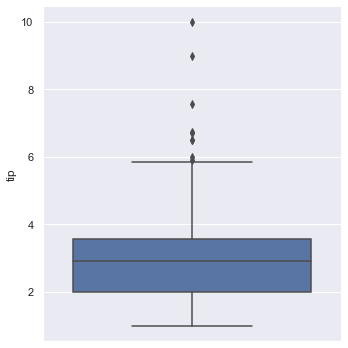

In [81]:
sns.catplot(data = tips, y = 'tip', kind = 'box')

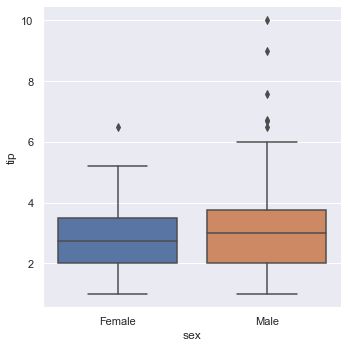

In [82]:
sns.catplot(data = tips, y = 'tip', kind = 'box', x = 'sex')

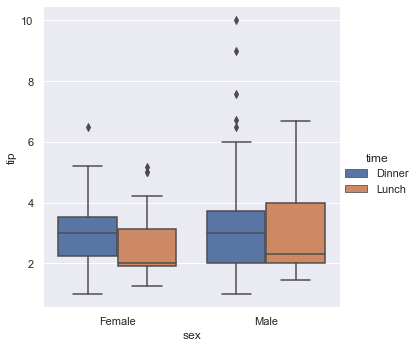

In [83]:
#broken down by sex, differentiated by time
sns.catplot(data = tips, y = 'tip', kind = 'box', x = 'sex', hue = 'time')

In [84]:
# descriptive statistics for tip

tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

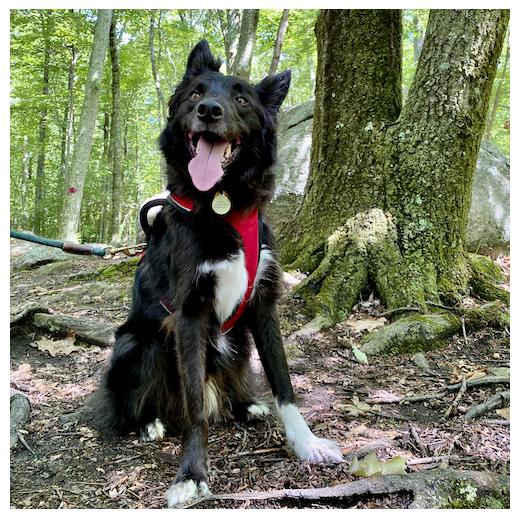

In [85]:
sns.dogplot() #what even is this?

<AxesSubplot:xlabel='sex', ylabel='tip'>

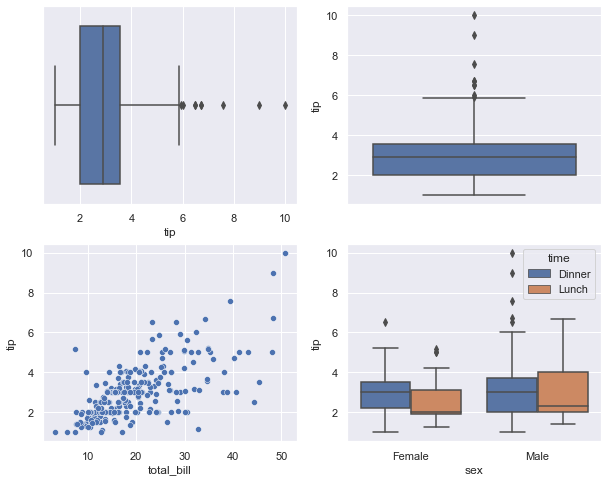

In [90]:
#  Create a figure with 4 subplots (Make sure to use axes-level seaborn functions)

# Create a figure with 4 boxplots
plt.figure(figsize = (10,8))

# first subplot
plt.subplot(221) #rows, #cols, index
sns.boxplot(data = tips, x = 'tip')

# Second subplot
plt.subplot(222)
sns.boxplot(data = tips, y = 'tip')

#third subplot
plt.subplot(223)
sns.scatterplot(data = tips, y = 'tip', x = 'total_bill')
#sns.relplot(data = tips, y = 'tip', x = 'total_bill') #not axis level


# 4th subplot
plt.subplot(224)
sns.boxplot(data = tips, y = 'tip', x = 'sex', hue = 'time')


<AxesSubplot:ylabel='tip'>

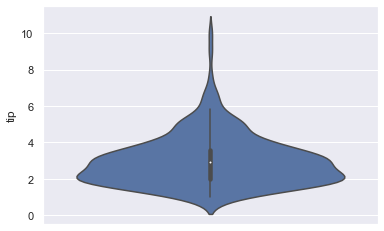

In [92]:
sns.violinplot(data = tips, y = 'tip')

<AxesSubplot:ylabel='tip'>

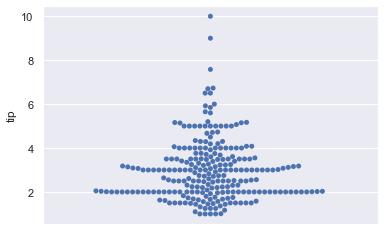

In [93]:
sns.swarmplot(data = tips, y = 'tip')

<AxesSubplot:ylabel='tip'>

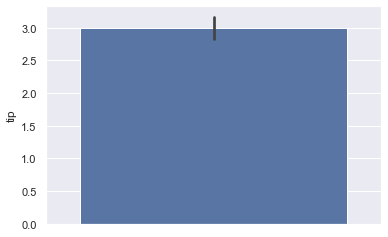

In [94]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI

sns.barplot(data = tips, y = 'tip') #height of bar represents mean by default

#### Pairplot

<AxesSubplot:xlabel='sex', ylabel='tip'>

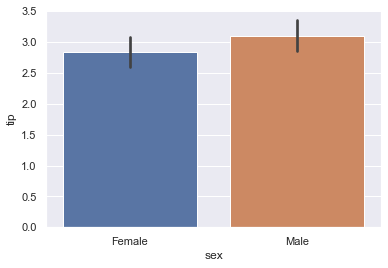

In [95]:
sns.barplot(data = tips, y = 'tip', x = 'sex')

<AxesSubplot:xlabel='sex', ylabel='tip'>

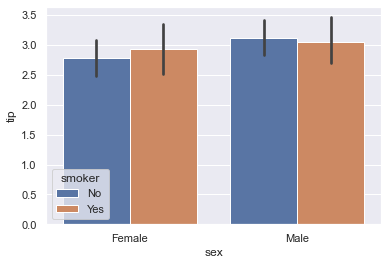

In [96]:
sns.barplot(data = tips, y = 'tip', x = 'sex', hue = 'smoker')

<AxesSubplot:xlabel='sex', ylabel='tip'>

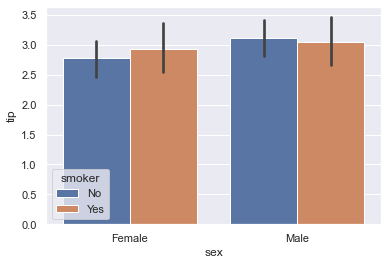

In [98]:
sns.barplot(data = tips, y = 'tip', x = 'sex', hue = 'smoker', estimator = np.mean) #np.mean is the default for the estimator

<AxesSubplot:xlabel='sex', ylabel='tip'>

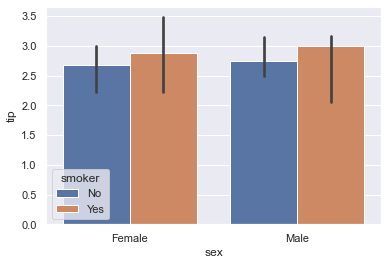

In [99]:
sns.barplot(data = tips, y = 'tip', x = 'sex', hue = 'smoker', estimator = np.median) #can also show median

In [27]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

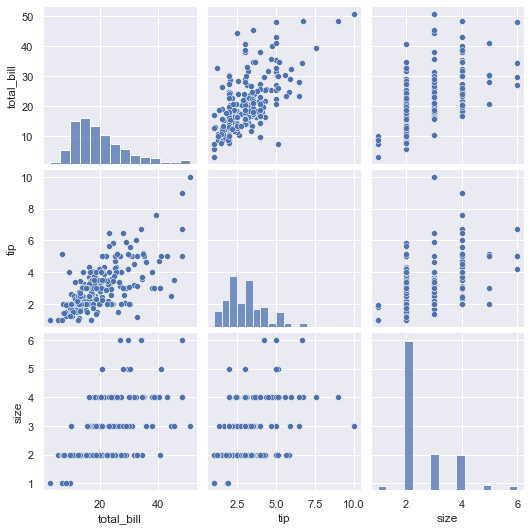

In [28]:
# pairplot for whole dataframe, can also pass along a subset of a dataframe and pass that along

sns.pairplot(tips) #numeric columns

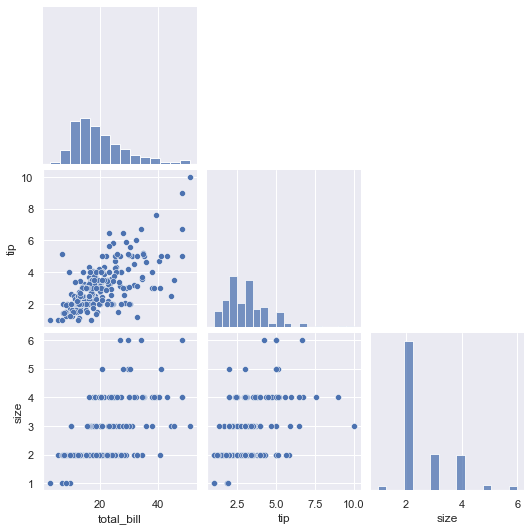

In [29]:
# argument corner = True will not render duplicate plots

sns.pairplot(tips, corner = True)

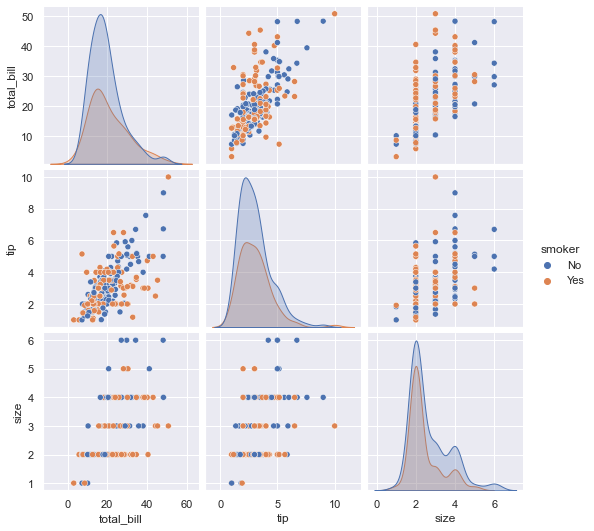

In [100]:
# use hue argument to visualize relationship based of different categories

sns.pairplot(tips, hue = 'smoker') 

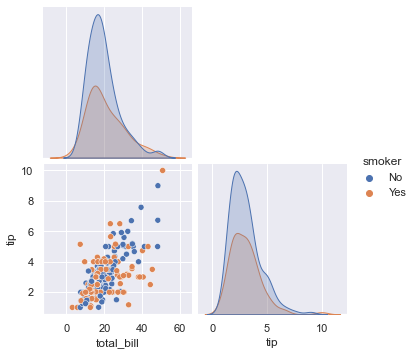

In [104]:
# if I only cared about certain numeric variables I can subset 
# bc hue is set to smoker, must have smoker in the list of subsetted columns
sns.pairplot(tips[['total_bill', 'tip', 'smoker']], hue = 'smoker', corner = True)

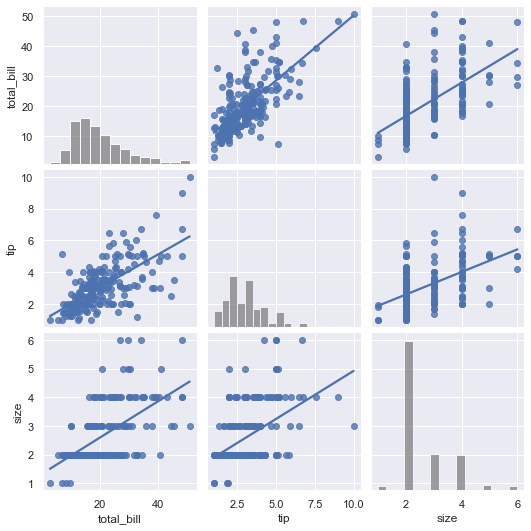

In [102]:
# use different plot type. 'reg' plot instead of 'scatter'

sns.pairplot(tips, diag_kind= 'hist',
             diag_kws= {'color': 'gray'},
             kind = 'reg',
             plot_kws={'ci': None})

#### Heatmap

In [32]:
#crosstab of time vs smoker
ctab = pd.crosstab(tips.time, tips.smoker)
ctab

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


<AxesSubplot:xlabel='smoker', ylabel='time'>

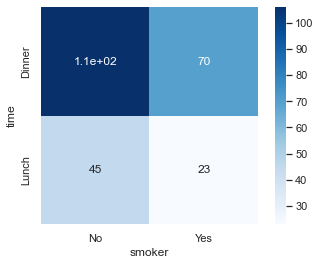

In [33]:
#create a heatmap

sns.heatmap(ctab, cmap = 'Blues', annot = True, square = True)

<AxesSubplot:xlabel='smoker', ylabel='time'>

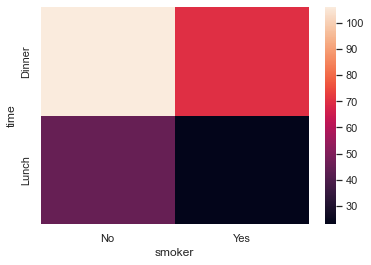

In [105]:
#create a heatmap

sns.heatmap(ctab)

<AxesSubplot:xlabel='smoker', ylabel='time'>

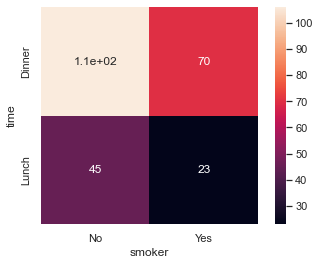

In [106]:
sns.heatmap(ctab, annot = True, square = True)

<AxesSubplot:xlabel='smoker', ylabel='time'>

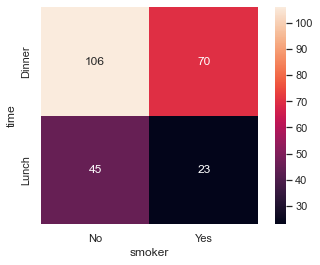

In [107]:
sns.heatmap(ctab, annot = True, square = True, fmt = '0.0f')

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

- SEQUENTIAL: e.g. different shades of same color.  Appropriate when data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)
- DIVERGING - highlight both low and high values

<AxesSubplot:xlabel='smoker', ylabel='time'>

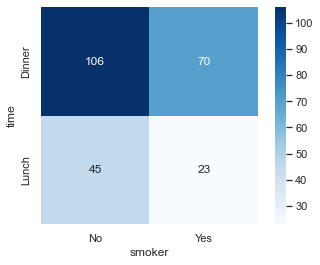

In [108]:
sns.heatmap(ctab, annot = True, square = True, fmt = '0.0f', cmap = 'Blues') #darker number is linked to higher number normally

In [ ]:
sns.heatmap(ctab, annot = True, square = True, fmt = '0.0f', cmap = 'Blues') #try diverging

In [ ]:
sns.heatmap(ctab, annot = True, square = True, fmt = '0.0f', cmap = 'Blues') #try sequential

In [34]:
# Heatmap using mpg dataset

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [35]:
# calculate correlation for numeric variables using panda's .corr() method

mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


In [36]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

<AxesSubplot:>

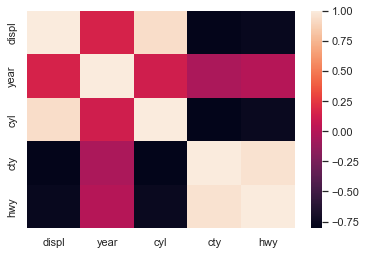

In [109]:
# heatmap for correlation table above
sns.heatmap(mpg.corr()) #not too great looking of a result

<AxesSubplot:>

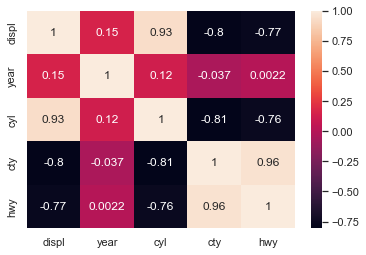

In [110]:
sns.heatmap(mpg.corr(), annot = True)

<AxesSubplot:>

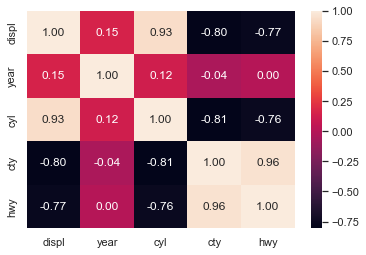

In [112]:
sns.heatmap(mpg.corr(), annot = True,
           fmt = '0.2f')

In [113]:
sns.heatmap(mpg.corr(), annot = True,
           fmt = '0.2f',
           cmap = 'a, f') #value error lists out colors

ValueError: 'a, f' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<AxesSubplot:>

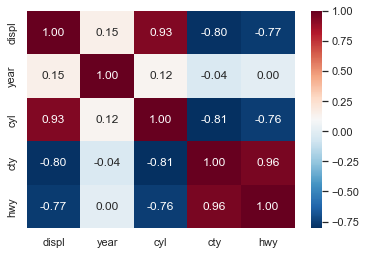

In [114]:
sns.heatmap(mpg.corr(), annot = True,
           fmt = '0.2f',
           cmap = 'RdBu_r')

<AxesSubplot:>

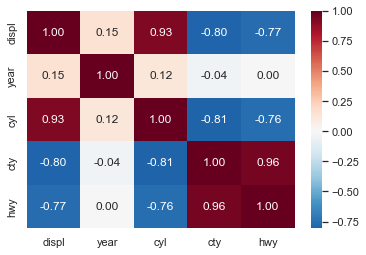

In [116]:
sns.heatmap(mpg.corr(), annot = True,
           fmt = '0.2f',
           cmap = 'RdBu_r',
           center = 0)

<AxesSubplot:>

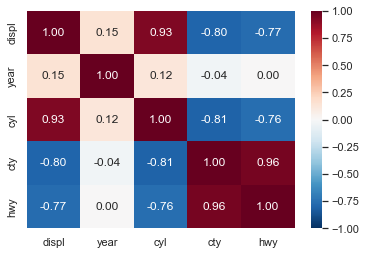

In [117]:
sns.heatmap(mpg.corr(), annot = True,
           fmt = '0.2f',
           cmap = 'RdBu_r',
           center = 0,
           vmin = -1)

In [ ]:
sns.heatmap(mpg.corr(), annot = True,
           fmt = '0.2f',
           cmap = 'RdBu_r',
           center = 0,
           vmin = -1,
           linewidth = 1)

<AxesSubplot:>

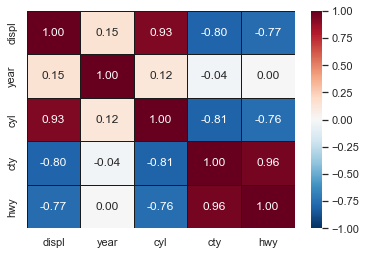

In [118]:
sns.heatmap(mpg.corr(), annot = True,
           fmt = '0.2f',
           cmap = 'RdBu_r',
           center = 0,
           vmin = -1, #even though this data set didn't reach -1, can force to show -1 correlation color
           linewidth = 1,
           linecolor = 'k')

<AxesSubplot:>

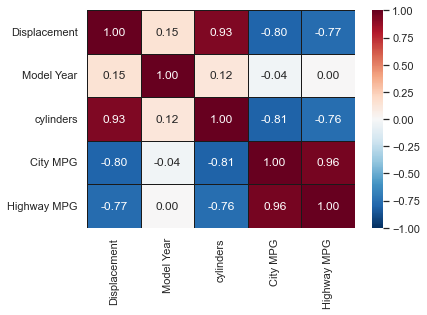

In [120]:
sns.heatmap(mpg.corr(), annot = True,
           fmt = '0.2f',
           cmap = 'RdBu_r',
           center = 0,
           vmin = -1,
           linewidth = 1,
           linecolor = 'k',
           xticklabels = labels, #labels list variable from earlier
           yticklabels = labels) #labels list variable from earlier